In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [13]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias


print(x[:10])
print(y[:10])
print(x.shape,y.shape)


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
torch.Size([50, 1]) torch.Size([50, 1])


In [14]:
train_split = int(0.8*len(x))

x_train, y_train = x[:train_split], y[:train_split]
x_test,y_test = y[train_split:],y[train_split:]

print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

40 10
40 10


In [15]:
from torch.utils.data import TensorDataset , DataLoader


train_dataset = TensorDataset(x_train,y_train)
test_dataset = TensorDataset(x_test,y_test)

In [17]:
print(train_dataset)
print(test_dataset)

In [18]:
BATCH_SIZE = 8
NUM_WORKERS= 0 # how many helps in the loading of data


train_dataloader = DataLoader(dataset =train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader( dataset= test_dataset,
                             batch_size= BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_WORKERS)

In [21]:
print(train_dataloader)
print(test_dataloader)
print(len(test_dataloader))
print(len(train_dataloader))

2
5


In [25]:
for batch_x,batch_y in train_dataloader:
  print(batch_x.shape)
  print(batch_x.shape)
  print(batch_x)
  print(batch_y.flatten())
  break

torch.Size([8, 1])
torch.Size([8, 1])
tensor([[0.5400],
        [0.0400],
        [0.5000],
        [0.2800],
        [0.5600],
        [0.1800],
        [0.2400],
        [0.3800]])
tensor([0.6780, 0.3280, 0.6500, 0.4960, 0.6920, 0.4260, 0.4680, 0.5660])


### Visualization

In [28]:
def plot_predictions(train_data=x_train,
                     train_label=y_train,
                     test_data=x_test,
                     test_label=y_test,
                     predictions=None):

    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_label, c='b', s=4, label='training data')
    plt.scatter(test_data, test_label, c='g', s=4, label='test data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=6, marker='^', label='predictions')

    plt.xlabel("input feature (X)", fontsize=14)
    plt.ylabel("target (Y)", fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.show()

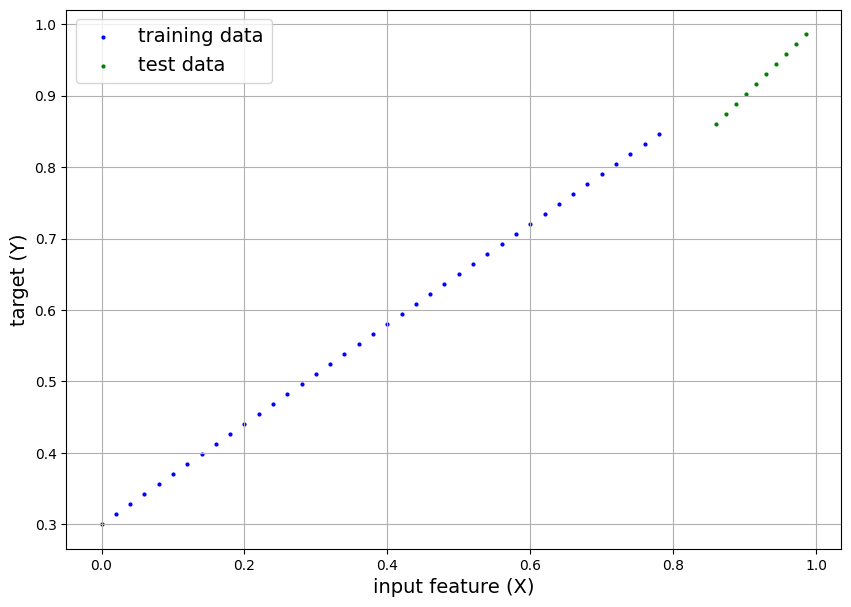

In [29]:
plot_predictions()